In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

seaborn.set()

NOISE_LEVELS = [0, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
np.concatenate([np.arange(0, 0.05, 0.005), np.arange(0.05, 0.2, 0.01)])

array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
        0.04 ,  0.045,  0.05 ,  0.06 ,  0.07 ,  0.08 ,  0.09 ,  0.1  ,
        0.11 ,  0.12 ,  0.13 ,  0.14 ,  0.15 ,  0.16 ,  0.17 ,  0.18 ,
        0.19 ,  0.2  ])

In [4]:
results = pd.read_csv('conll_noembed.csv', index_col=0)
results.columns

FileNotFoundError: File b'conll_noembed.csv' does not exist

In [3]:
results.sample(2)

,batch_size,char_embeddings_dim,clean_f1,clean_n_predicted_entities,clean_n_true_entities,clean_precision,clean_recall,dropout_rate,embeddings_dropout,epochs,...,noise_level,noised_f1,noised_n_predicted_entities,noised_n_true_entities,noised_precision,noised_recall,token_embeddings_dim,use_batch_norm,use_capitalization,use_crf
6,8,25,81.092049,5194,5648,84.636119,77.832861,0.5,True,5,...,0.125,69.243986,4828,5648,75.124275,64.217422,300,True,False,True
4,8,25,81.062937,5077,5648,85.621430,76.965297,0.5,True,5,...,0.075,72.784932,4758,5648,79.592266,67.050283,300,True,False,True


# CONLL

0.805428170332
0.821362458349
0.79928450386
0.810922787194
0.855686988171
0.864181933039
0.855539464156
0.861965695617


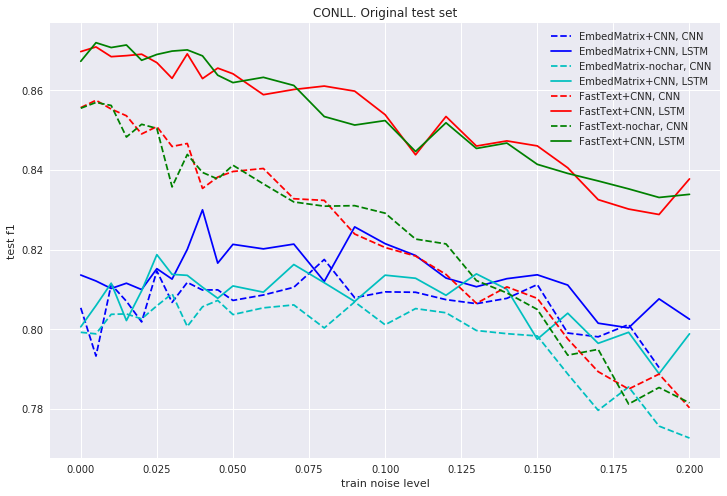

In [6]:
plt.figure(figsize=(12, 8))
plt.title('CONLL. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b--', label='EmbedMatrix+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b', label='EmbedMatrix+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c--', label='EmbedMatrix-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c', label='EmbedMatrix+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r--', label='FastText+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g--', label='FastText-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll_word2vec_fixed.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='m', label='Word2Vec')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll_word2vec_fixed_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='k', label='Word2Vec-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)


plt.legend()

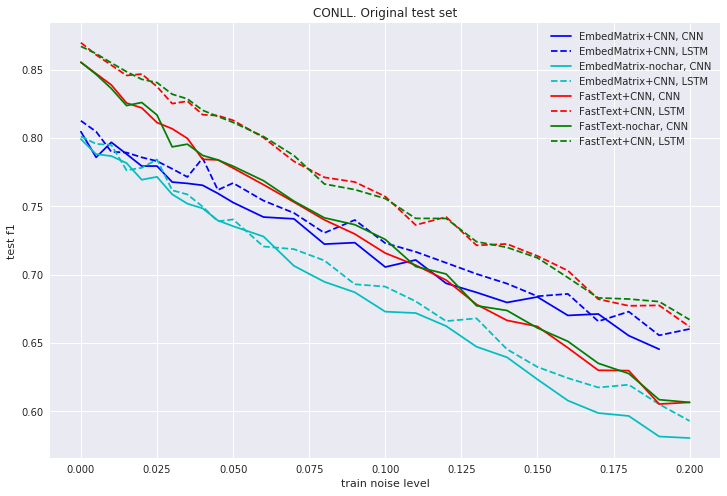

In [133]:
plt.figure(figsize=(12, 8))
plt.title('CONLL. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'b', label='EmbedMatrix+CNN, CNN')

results = pd.read_csv('results/conll2003_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'b--', label='EmbedMatrix+CNN, LSTM')

results = pd.read_csv('results/conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'c', label='EmbedMatrix-nochar, CNN')

results = pd.read_csv('results/conll2003_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'c--', label='EmbedMatrix+CNN, LSTM')

results = pd.read_csv('results/conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='r', label='FastText+CNN, CNN')

results = pd.read_csv('results/conll2003_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'r--', label='FastText+CNN, LSTM')

results = pd.read_csv('results/conll2003_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'g', label='FastText-nochar, CNN')

results = pd.read_csv('results/conll2003_fasttext_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'g--', label='FastText+CNN, LSTM')


# results = pd.read_csv('results/conll_word2vec_fixed.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='m', label='Word2Vec')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll_word2vec_fixed_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='k', label='Word2Vec-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)


plt.legend()

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('CONLL. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='b', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='-b', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='c', label='EmbedMatrix-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='-c', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='-r', label='FastText+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='g', label='FastText-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_fasttext_nochar_lstmnet', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='-g', label='FastText+CNN')
print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll_word2vec_fixed.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='m', label='Word2Vec')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll_word2vec_fixed_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='k', label='Word2Vec-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/conll2003_noembed_not_trainable_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
# print(results['clean_f1'][0] / 100.)


plt.legend(loc=(0.68, 0.19))


0.805428170332
0.79928450386
0.855686988171
0.855539464156
0.727136291155
0.723160660661
0.692922596997
0.608954588961


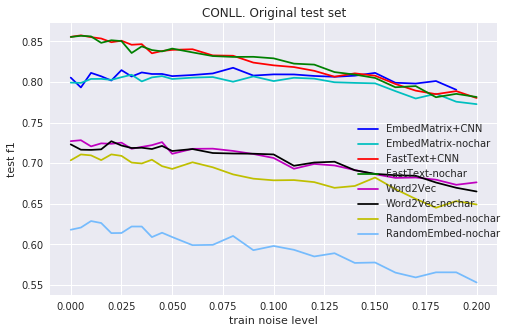

In [118]:
plt.figure(figsize=(8, 5))
plt.title('CONLL. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='b', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='c', label='EmbedMatrix-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN')
print(results['clean_f1'][0] / 100.)


results = pd.read_csv('results/conll2003_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='g', label='FastText-nochar')
print(results['clean_f1'][0] / 100.)


results = pd.read_csv('results/conll_word2vec_fixed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='m', label='Word2Vec')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll_word2vec_fixed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='k', label='Word2Vec-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)


# results = pd.read_csv('conll_FastText_grunet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText-CNN')

# results = pd.read_csv('conll.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word2Vec-nochar-CNN')


plt.legend(loc=(0.68, 0.19))


0.692922596997
0.608954588961


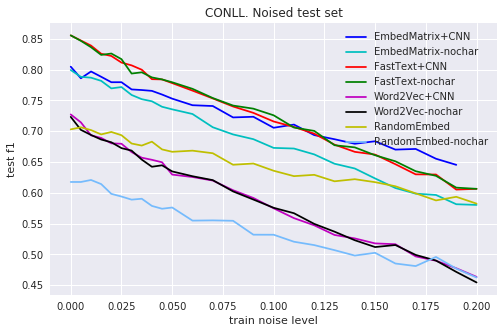

In [121]:
plt.figure(figsize=(8, 5))
plt.title('CONLL. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')

results = pd.read_csv('results/conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='b', label='EmbedMatrix+CNN')

results = pd.read_csv('results/conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='c', label='EmbedMatrix-nochar')

results = pd.read_csv('results/conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='r', label='FastText+CNN')

results = pd.read_csv('results/conll2003_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='g', label='FastText-nochar')

results = pd.read_csv('results/conll_word2vec_fixed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='m', label='Word2Vec+CNN')

results = pd.read_csv('results/conll_word2vec_fixed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='k', label='Word2Vec-nochar')

results = pd.read_csv('results/conll2003_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='y', label='RandomEmbed')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/conll2003_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)


plt.legend()


# Persons 1000

0.845943482224
0.814211695041
0.687004270897
0.688752556237
0.72444194335
0.723696772962
0.767056162835
0.48499754058


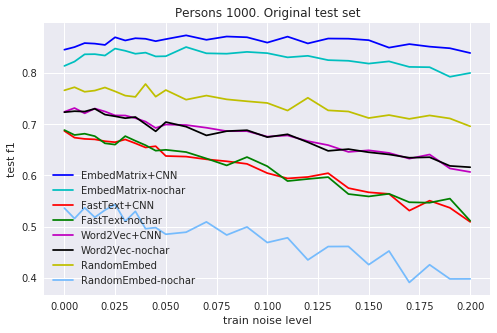

In [111]:
plt.figure(figsize=(8, 5))
plt.title('Persons 1000. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/collection5_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='b', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='c', label='EmbedMatrix-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='g', label='FastText-nochar')
print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext_lenta.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText(lenta)+CNN')

# results = pd.read_csv('results/collection5_noembed_lstm_first11.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='k', label='EmbedMatrix+CNN, LSTM')

# results = pd.read_csv('results/collection5_fasttext_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='k', label='FastText+CNN, LSTM')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext_nochar_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='g', label='FastText-nochar, LSTM')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_noembed_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word2Vec+CNN')
# print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_word2vec_fixed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='m', label='Word2Vec+CNN')
print(results['clean_f1'][0] / 100.)


results = pd.read_csv('results/collection5_word2vec_fixed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='k', label='Word2Vec-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)


# results = pd.read_csv('conll_FastText_grunet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText-CNN')

# results = pd.read_csv('conll.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word2Vec-nochar-CNN')


plt.legend()

0.767056162835
0.48499754058


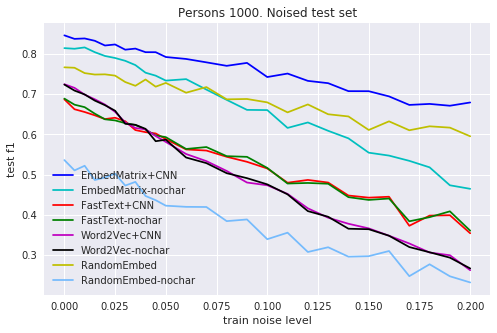

In [112]:
plt.figure(figsize=(8, 5))
plt.title('Persons 1000. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')

results = pd.read_csv('results/collection5_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='b', label='EmbedMatrix+CNN')

results = pd.read_csv('results/collection5_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='c', label='EmbedMatrix-nochar')

results = pd.read_csv('results/collection5_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='r', label='FastText+CNN')

results = pd.read_csv('results/collection5_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='g', label='FastText-nochar')

# results = pd.read_csv('results/collection5_fasttext_lenta.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['noised_f1'], color='r', label='FastText(lenta)+CNN')

# results = pd.read_csv('results/collection5_noembed_lstm_first11.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['noised_f1'], color='k', label='EmbedMatrix+CNN, LSTM')

results = pd.read_csv('results/collection5_word2vec_fixed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='m', label='Word2Vec+CNN')

results = pd.read_csv('results/collection5_word2vec_fixed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='k', label='Word2Vec-nochar')

results = pd.read_csv('results/collection5_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='y', label='RandomEmbed')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)


# results = pd.read_csv('conll_noembed_grunet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='g', label='Word2Vec-GRU')


plt.legend()


0.845943482224
0.886102772382
0.814211695041
0.860036832413
0.687004270897
0.780524066159
0.688752556237
0.790888722928


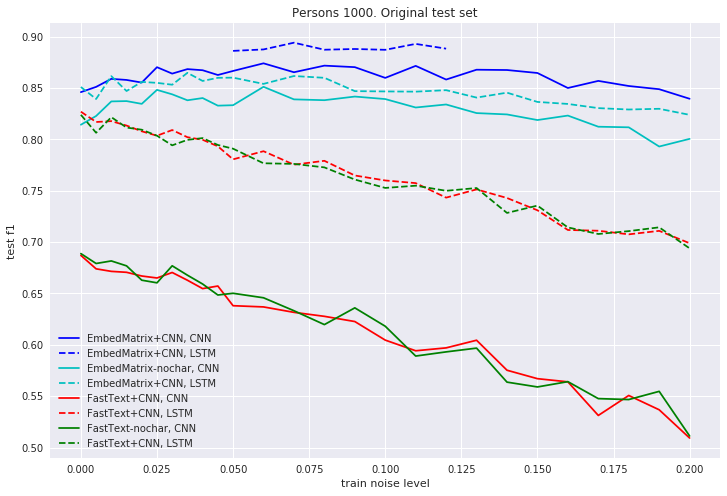

In [7]:
plt.figure(figsize=(12, 8))
plt.title('Persons 1000. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/collection5_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b', label='EmbedMatrix+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b--', label='EmbedMatrix+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c', label='EmbedMatrix-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c--', label='EmbedMatrix+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r--', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g', label='FastText-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/collection5_fasttext_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g--', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

plt.legend()

# Factru

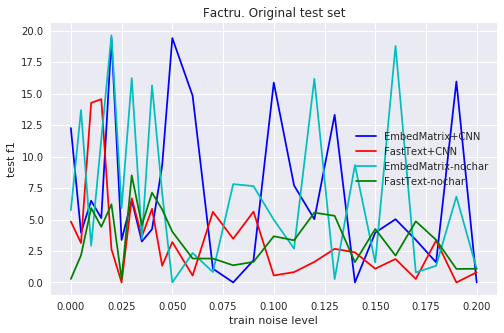

In [22]:
plt.figure(figsize=(8, 5))
plt.title('Factru. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/factru_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='b', label='EmbedMatrix+CNN')

results = pd.read_csv('results/factru_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText+CNN')

results = pd.read_csv('results/factru_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='c', label='EmbedMatrix-nochar')

results = pd.read_csv('results/factru_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='g', label='FastText-nochar')


plt.legend()

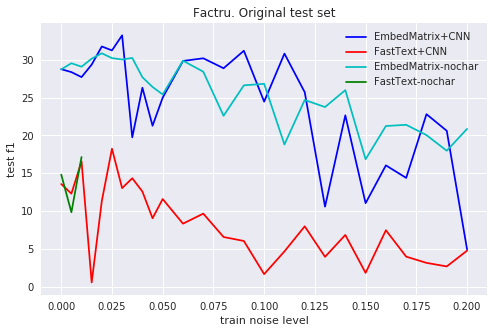

In [78]:
plt.figure(figsize=(8, 5))
plt.title('Factru. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/factru_noembed_20epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='b', label='EmbedMatrix+CNN')

results = pd.read_csv('results/factru_fasttext_20epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText+CNN')

results = pd.read_csv('results/factru_noembed_nochar_20epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='c', label='EmbedMatrix-nochar')

results = pd.read_csv('results/factru_fasttext_nochar_20epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='g', label='FastText-nochar')


plt.legend()

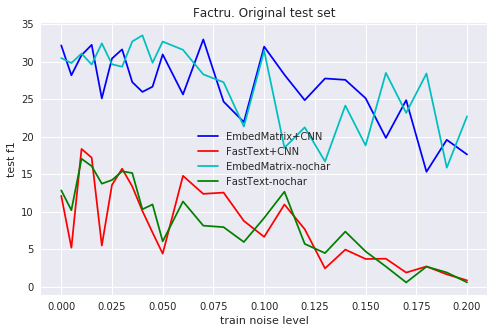

In [27]:
plt.figure(figsize=(8, 5))
plt.title('Factru. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/factru_noembed_30epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='b', label='EmbedMatrix+CNN')

results = pd.read_csv('results/factru_fasttext_30epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText+CNN')

results = pd.read_csv('results/factru_noembed_nochar_30epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='c', label='EmbedMatrix-nochar')

results = pd.read_csv('results/factru_fasttext_nochar_30epochs.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='g', label='FastText-nochar')


plt.legend()

# CAp

0.421578421578
0.438242707958
0.362223550508
0.232179226069


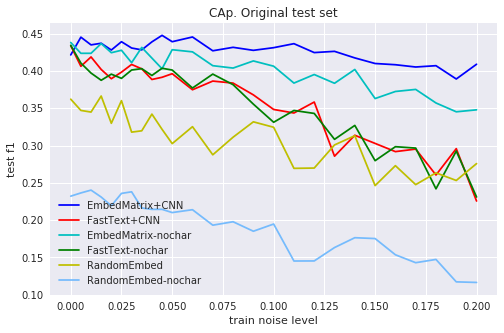

In [114]:
plt.figure(figsize=(8, 5))
plt.title('CAp. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='b', label='EmbedMatrix+CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN')

results = pd.read_csv('results/CAp_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='c', label='EmbedMatrix-nochar')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='g', label='FastText-nochar')

results = pd.read_csv('results/CAp_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='y', label='RandomEmbed')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['clean_f1'][0] / 100.)


plt.legend()

0.618742943169
0.636182902584
0.585512216031
0.422690763052


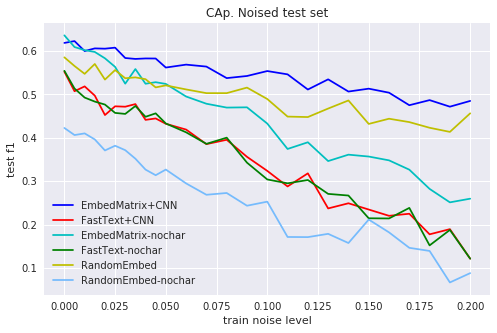

In [139]:
plt.figure(figsize=(8, 5))
plt.title('CAp. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='b', label='EmbedMatrix+CNN')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='r', label='FastText+CNN')

results = pd.read_csv('results/CAp_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='c', label='EmbedMatrix-nochar')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='g', label='FastText-nochar')

results = pd.read_csv('results/CAp_noembed_not_trainable.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='y', label='RandomEmbed')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_not_trainable_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='xkcd:sky blue', label='RandomEmbed-nochar')
print(results['noised_f1'][0] / 100.)


plt.legend()

In [136]:
results = pd.read_csv('results/CAp_noembed_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_nochar_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_not_trainable_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_not_trainable_nochar_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar_original.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
print(results['clean_f1'][0] / 100.)


0.435515002632
0.442936238614
0.309523809524
0.226837060703
0.409146877748
0.412896515861


0.421578421578
0.389191997922
0.438242707958
0.383936200513
0.433921074727
0.519333441191
0.434370771313
0.533247256294


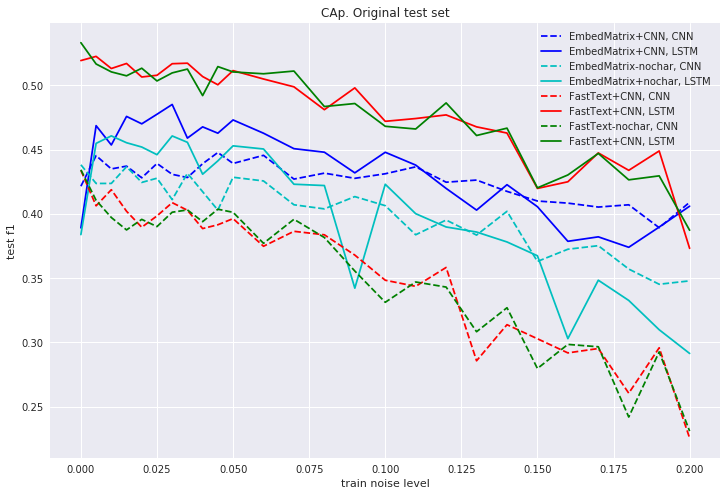

In [9]:
plt.figure(figsize=(12, 8))
plt.title('CAp. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b--', label='EmbedMatrix+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b', label='EmbedMatrix+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c--', label='EmbedMatrix-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c', label='EmbedMatrix+nochar, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r--', label='FastText+CNN, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g--', label='FastText-nochar, CNN')
print(results['clean_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g', label='FastText+CNN, LSTM')
print(results['clean_f1'][0] / 100.)

plt.legend()

0.618742943169
0.592332268371
0.636182902584
0.58615916955
0.552388289676
0.668828828829
0.554478480031
0.690699351118


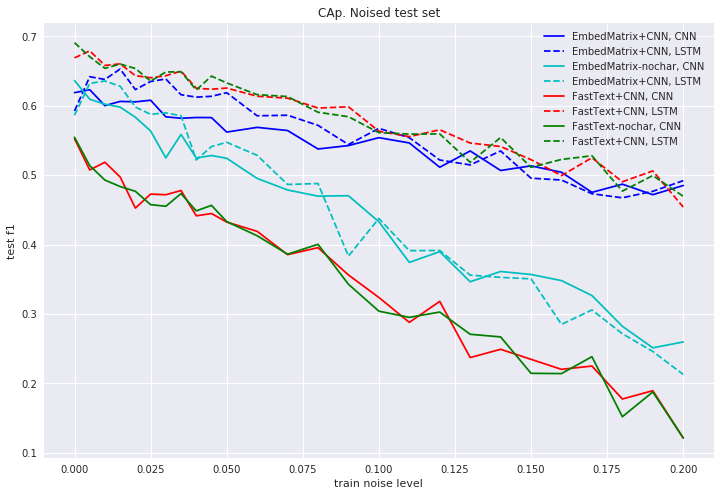

In [161]:
plt.figure(figsize=(12, 8))
plt.title('CAp. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'b', label='EmbedMatrix+CNN, CNN')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'b--', label='EmbedMatrix+CNN, LSTM')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'c', label='EmbedMatrix-nochar, CNN')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_noembed_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'c--', label='EmbedMatrix+CNN, LSTM')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., color='r', label='FastText+CNN, CNN')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'r--', label='FastText+CNN, LSTM')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'g', label='FastText-nochar, CNN')
print(results['noised_f1'][0] / 100.)

results = pd.read_csv('results/CAp_fasttext_nochar_lstmnet.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'g--', label='FastText+CNN, LSTM')
print(results['noised_f1'][0] / 100.)

plt.legend()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('CAp. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b', label='EmbedMatrix+CNN, CNN')
print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_noembed_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'b--', label='EmbedMatrix+CNN, LSTM')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_noembed_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c', label='EmbedMatrix-nochar, CNN')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_noembed_nochar_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'c--', label='EmbedMatrix+CNN, LSTM')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., color='r', label='FastText+CNN, CNN')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'r--', label='FastText+CNN, LSTM')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext_nochar.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g', label='FastText-nochar, CNN')
# print(results['clean_f1'][0] / 100.)

# results = pd.read_csv('results/collection5_fasttext_nochar_lstmnet.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'] / 100., 'g--', label='FastText+CNN, LSTM')
# print(results['clean_f1'][0] / 100.)

plt.legend()